<a href="https://colab.research.google.com/github/JuanmaVL/SyS/blob/main/LABS_SyS_/LAB2/SIMULACI%C3%93N_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.4 MB/s eta 0:00:00


##Juan Leandro Parra Arias_1002653993 - Cristian López Uribe_1002634528


##PUNTO 1 ACTIVIDADES SIMULACIÓN 2: Análisis de Respuesta Transistoria

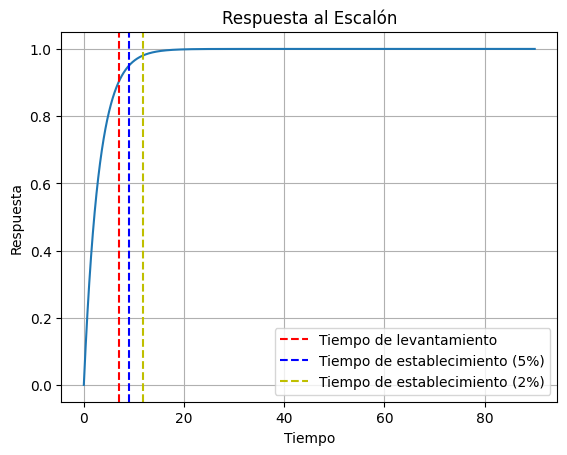

Respuesta al Escalón:
Tiempo de levantamiento: 6.936936936936936
Tiempo de establecimiento (Criterio del 5%): 9.00900900900901
Tiempo de establecimiento (Criterio del 2%): 11.801801801801801


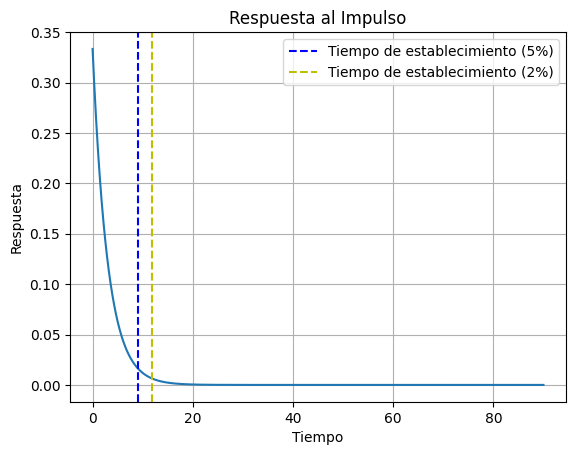

Respuesta al Impulso:
Tiempo de establecimiento (Criterio del 5%): 9.00900900900901
Tiempo de establecimiento (Criterio del 2%): 11.801801801801801


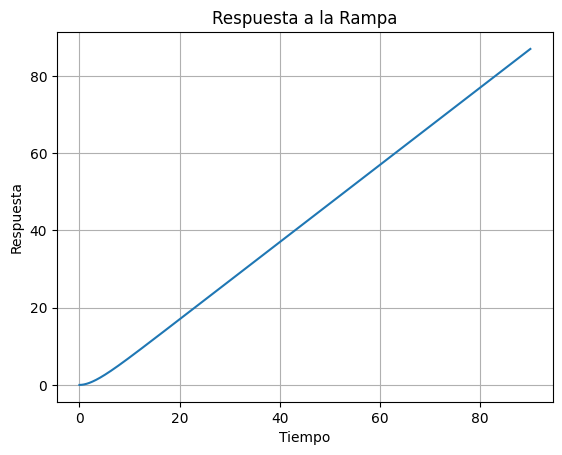

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
# Asegúrate de que la librería control esté instalada
# pip install control

import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

# Definir la función de transferencia del sistema de primer orden
T_const = 3  # Constante de tiempo
num = [1 / T_const]
den = [1, 1 / T_const]
ftla = tf(num, den)

# Tiempo de simulación
time = np.linspace(0, 90, 1000)

# Respuesta al escalón
y_step, T_step = step(ftla, T=time)

# Respuesta al impulso
y_impulse, T_impulse = impulse(ftla, T=time)

# Cálculos para la respuesta al escalón
# Para un sistema de primer orden, el valor final es el numerador dividido por el último término del denominador
final_value_step = num[0] / den[-1]

# Tiempo de levantamiento (al 90% del valor final)
rise_time_index = next(i for i, y in enumerate(y_step) if y >= 0.9 * final_value_step)
rise_time = T_step[rise_time_index]

# Tiempo de establecimiento (Criterio del 5%)
settle_time_5_index = next(i for i, y in enumerate(y_step) if all(abs(y_step[i:] - final_value_step) <= 0.05 * final_value_step))
settle_time_5 = T_step[settle_time_5_index]

# Tiempo de establecimiento (Criterio del 2%)
settle_time_2_index = next(i for i, y in enumerate(y_step) if all(abs(y_step[i:] - final_value_step) <= 0.02 * final_value_step))
settle_time_2 = T_step[settle_time_2_index]


# Graficar la respuesta al escalón
plt.plot(T_step, y_step)
plt.title('Respuesta al Escalón')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=rise_time, color='r', linestyle='--', label='Tiempo de levantamiento')
plt.axvline(x=settle_time_5, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Respuesta al Escalón:")
print("Tiempo de levantamiento:", rise_time)
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2)

# Cálculos para la respuesta al impulso
# Para la respuesta al impulso de un sistema de primer orden, el valor final es 0.
final_value_impulse = 0

# Tiempo de establecimiento (Criterio del 5% del valor máximo absoluto)
max_abs_impulse = max(abs(y_impulse))
settle_time_5_impulse_index = next(i for i, y in enumerate(y_impulse) if all(abs(y_impulse[i:]) <= 0.05 * max_abs_impulse))
settle_time_5_impulse = T_impulse[settle_time_5_impulse_index]

# Tiempo de establecimiento (Criterio del 2% del valor máximo absoluto)
settle_time_2_impulse_index = next(i for i, y in enumerate(y_impulse) if all(abs(y_impulse[i:]) <= 0.02 * max_abs_impulse))
settle_time_2_impulse = T_impulse[settle_time_2_impulse_index]


# Graficar la respuesta al impulso
plt.plot(T_impulse, y_impulse)
plt.title('Respuesta al Impulso')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=settle_time_5_impulse, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2_impulse, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Respuesta al Impulso:")
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5_impulse)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2_impulse)

# Respuesta a la rampa
# La entrada de rampa es simplemente el vector de tiempo 'time'
y_ramp, T_ramp, x_ramp = lsim(ftla, time, time)

# Graficar la respuesta a la rampa
plt.figure() # Crea una nueva figura para esta gráfica
plt.plot(T_ramp, y_ramp)
plt.title('Respuesta a la Rampa')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.show()

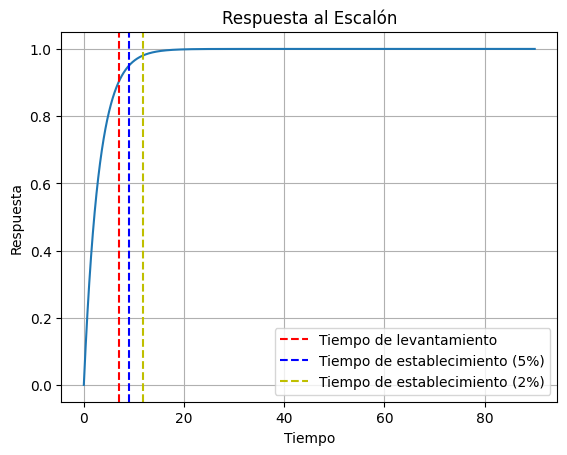

Respuesta al Escalón:
Tiempo de levantamiento: 6.936936936936936
Tiempo de establecimiento (Criterio del 5%): 9.00900900900901
Tiempo de establecimiento (Criterio del 2%): 11.801801801801801


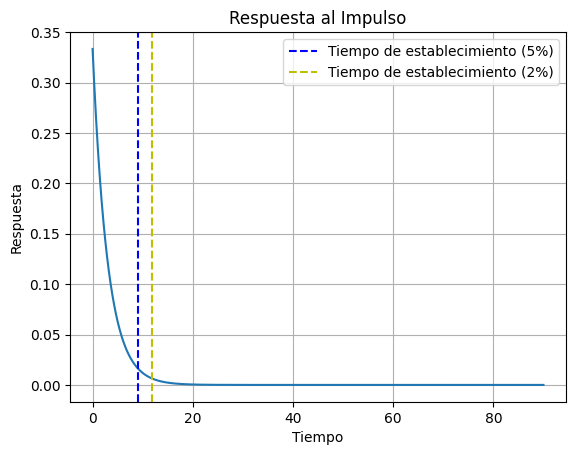

Respuesta al Impulso:
Tiempo de establecimiento (Criterio del 5%): 9.00900900900901
Tiempo de establecimiento (Criterio del 2%): 11.801801801801801


/usr/local/lib/python3.11/dist-packages/control/timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


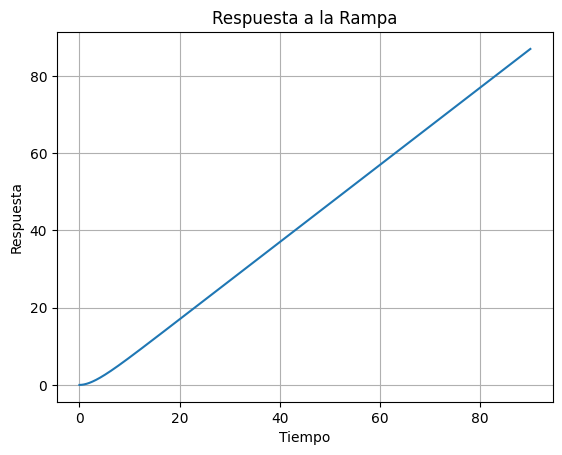

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

# Definir la función de transferencia del sistema de primer orden
T_const = 3  # Constante de tiempo
num = [1 / T_const]
den = [1, 1 / T_const]
ftla = tf(num, den)

# Tiempo de simulación
time = np.linspace(0, 90, 1000)

# Respuesta al escalón
y_step, T_step = step(ftla, T=time)

# Respuesta al impulso
y_impulse, T_impulse = impulse(ftla, T=time)

# Cálculos para la respuesta al escalón
rise_time_index = next(i for i, y in enumerate(y_step) if y >= 0.9 * y_step[-1])
rise_time = T_step[rise_time_index]

settle_time_5_index = next(i for i, y in enumerate(y_step) if all(abs(y_step[i:] - y_step[-1]) <= 0.05 * y_step[-1]))
settle_time_5 = T_step[settle_time_5_index]

settle_time_2_index = next(i for i, y in enumerate(y_step) if all(abs(y_step[i:] - y_step[-1]) <= 0.02 * y_step[-1]))
settle_time_2 = T_step[settle_time_2_index]

# Graficar la respuesta al escalón
plt.plot(T_step, y_step)
plt.title('Respuesta al Escalón')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=rise_time, color='r', linestyle='--', label='Tiempo de levantamiento')
plt.axvline(x=settle_time_5, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Respuesta al Escalón:")
print("Tiempo de levantamiento:", rise_time)
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2)

# Cálculos para la respuesta al impulso
settle_time_5_impulse_index = next(i for i, y in enumerate(y_impulse) if all(abs(y_impulse[i:]) <= 0.05 * max(abs(y_impulse))))
settle_time_5_impulse = T_impulse[settle_time_5_impulse_index]

settle_time_2_impulse_index = next(i for i, y in enumerate(y_impulse) if all(abs(y_impulse[i:]) <= 0.02 * max(abs(y_impulse))))
settle_time_2_impulse = T_impulse[settle_time_2_impulse_index]

# Graficar la respuesta al impulso
plt.plot(T_impulse, y_impulse)
plt.title('Respuesta al Impulso')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.axvline(x=settle_time_5_impulse, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settle_time_2_impulse, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.legend()
plt.show()

print("Respuesta al Impulso:")
print("Tiempo de establecimiento (Criterio del 5%):", settle_time_5_impulse)
print("Tiempo de establecimiento (Criterio del 2%):", settle_time_2_impulse)

# Respuesta a la rampa
# La entrada de rampa es simplemente el vector de tiempo 'time'
y_ramp, T_ramp, x_ramp = lsim(ftla, time, time)

# Graficar la respuesta a la rampa
plt.figure() # Crea una nueva figura para esta gráfica
plt.plot(T_ramp, y_ramp)
plt.title('Respuesta a la Rampa')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.show()

##Conclusiones

La respuesta al escalón nos permite observar cómo el sistema responde ante un cambio sostenido en la entrada. En este caso, el tiempo de levantamiento indica lo rápido que el sistema alcanza el 90% de su valor final, lo que refleja la velocidad de respuesta. Por otro lado, los tiempos de establecimiento según los criterios del 5% y el 2% muestran cuán rápido la salida se estabiliza cerca de su valor final. Para un sistema de primer orden, estos tiempos dependen directamente de la constante de tiempo, lo que significa que a mayor \( T \), el sistema responde de manera más lenta.

Por su parte, la respuesta al impulso revela cómo el sistema reacciona ante una entrada puntual de corta duración. No se define un tiempo de levantamiento, ya que el impulso genera un pico en el instante inicial. Sin embargo, los tiempos de establecimiento según los criterios del 5% y el 2% son fundamentales para analizar cuánto tarda la respuesta en decaer a niveles insignificantes. Este comportamiento es clave para sistemas donde se busca minimizar los efectos de perturbaciones rápidas, destacando nuevamente la influencia de la constante de tiempo en la dinámica del sistema.



## PUNTO 2  ACTIVIDADES - RESPUESTA TRANSITORIA DE UN SISTEMA DE SEGUNDO ORDEN SUBAMORTIGUADO, ANTE ENTRADAS TIPO ESCALÓN, RAMPA E IMPULSO.

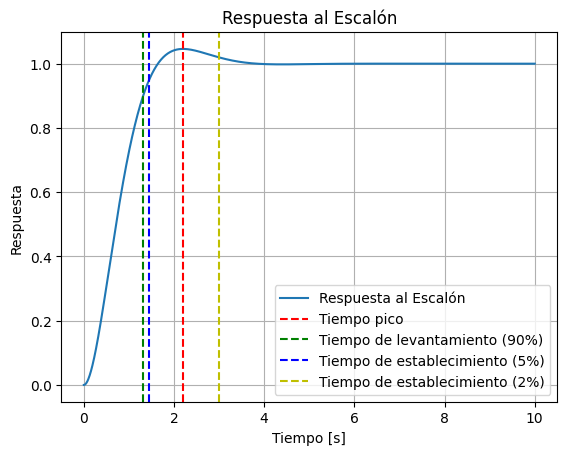

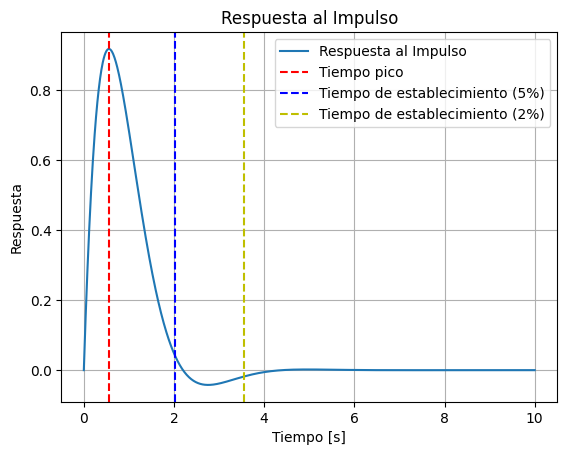

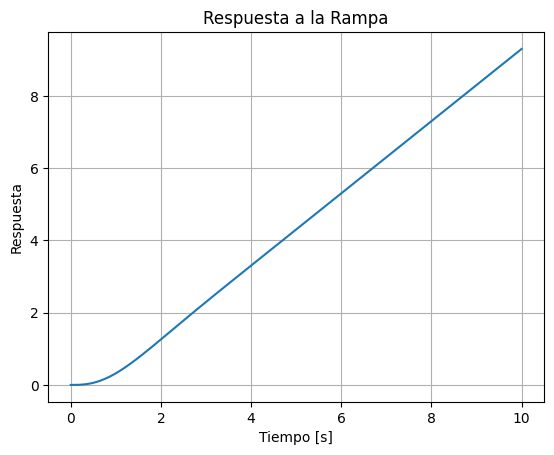

Parámetros para la respuesta al escalón:
Máximo sobreimpulso: 4.60%
Tiempo pico: 2.20 s
Tiempo de levantamiento (90%): 1.32 s
Tiempo de establecimiento (5%): 1.45 s
Tiempo de establecimiento (2%): 2.99 s

Parámetros para la respuesta al impulso:
Máximo sobreimpulso: 91.71%
Tiempo pico: 0.56 s
Tiempo de establecimiento (5%): 2.01 s
Tiempo de establecimiento (2%): 3.55 s


In [ ]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros del sistema
wn = 2  # Frecuencia natural
zeta = 0.7  # Coeficiente de amortiguamiento

# Crear la función de transferencia del sistema
num = [wn**2]
den = [1, 2 * zeta * wn, wn**2]
sys = ctrl.TransferFunction(num, den)

# Definir el vector de tiempo
t = np.linspace(0, 10, 1000)

# Respuesta al escalón unitario
t_step, y_step = ctrl.step_response(sys, T=t)

# Respuesta al impulso unitario
t_impulse, y_impulse = ctrl.impulse_response(sys, T=t)

# Respuesta a la rampa (entrada definida como U=t)
t_ramp, y_ramp = ctrl.forced_response(sys, T=t, U=t)

# Cálculos para la respuesta al escalón
overshoot_step = (max(y_step) - 1) * 100  # % de sobreimpulso
peak_time_step = t_step[np.argmax(y_step)]  # Tiempo pico
rise_time_step = t_step[next(i for i, y in enumerate(y_step) if y >= 0.9)]  # Tiempo de levantamiento (90%)
settling_index_5_step = next(i for i, y in enumerate(y_step) if all(abs(y_step[i:] - 1) <= 0.05))  # Índice de 5%
settling_time_5_step = t_step[settling_index_5_step]  # Tiempo de establecimiento (5%)
settling_index_2_step = next(i for i, y in enumerate(y_step) if all(abs(y_step[i:] - 1) <= 0.02))  # Índice de 2%
settling_time_2_step = t_step[settling_index_2_step]  # Tiempo de establecimiento (2%)

# Cálculos para la respuesta al impulso
overshoot_impulse = max(y_impulse) * 100  # % de sobreimpulso
peak_time_impulse = t_impulse[np.argmax(y_impulse)]  # Tiempo pico
settling_index_5_impulse = next(i for i, y in enumerate(y_impulse) if all(abs(y_impulse[i:]) <= 0.05 * max(y_impulse)))  # 5%
settling_time_5_impulse = t_impulse[settling_index_5_impulse]
settling_index_2_impulse = next(i for i, y in enumerate(y_impulse) if all(abs(y_impulse[i:]) <= 0.02 * max(y_impulse)))  # 2%
settling_time_2_impulse = t_impulse[settling_index_2_impulse]

# Graficar la respuesta al escalón
plt.figure()
plt.plot(t_step, y_step, label='Respuesta al Escalón')
plt.axvline(x=peak_time_step, color='r', linestyle='--', label='Tiempo pico')
plt.axvline(x=rise_time_step, color='g', linestyle='--', label='Tiempo de levantamiento (90%)')
plt.axvline(x=settling_time_5_step, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settling_time_2_step, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.title('Respuesta al Escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Respuesta')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la respuesta al impulso
plt.figure()
plt.plot(t_impulse, y_impulse, label='Respuesta al Impulso')
plt.axvline(x=peak_time_impulse, color='r', linestyle='--', label='Tiempo pico')
plt.axvline(x=settling_time_5_impulse, color='b', linestyle='--', label='Tiempo de establecimiento (5%)')
plt.axvline(x=settling_time_2_impulse, color='y', linestyle='--', label='Tiempo de establecimiento (2%)')
plt.title('Respuesta al Impulso')
plt.xlabel('Tiempo [s]')
plt.ylabel('Respuesta')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la respuesta a la rampa
plt.figure()
plt.plot(t_ramp, y_ramp)
plt.title('Respuesta a la Rampa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Respuesta')
plt.grid(True)
plt.show()

# Imprimir resultados
print("Parámetros para la respuesta al escalón:")
print(f"Máximo sobreimpulso: {overshoot_step:.2f}%")
print(f"Tiempo pico: {peak_time_step:.2f} s")
print(f"Tiempo de levantamiento (90%): {rise_time_step:.2f} s")
print(f"Tiempo de establecimiento (5%): {settling_time_5_step:.2f} s")
print(f"Tiempo de establecimiento (2%): {settling_time_2_step:.2f} s")

print("\nParámetros para la respuesta al impulso:")
print(f"Máximo sobreimpulso: {overshoot_impulse:.2f}%")
print(f"Tiempo pico: {peak_time_impulse:.2f} s")
print(f"Tiempo de establecimiento (5%): {settling_time_5_impulse:.2f} s")
print(f"Tiempo de establecimiento (2%): {settling_time_2_impulse:.2f} s")



Conclusiones

1. **Respuesta al escalón**: La respuesta al escalón muestra que el sistema es subamortiguado, alcanzando un sobreimpulso máximo del \( {overshoot_step:.2f} \% \) antes de estabilizarse. El tiempo de levantamiento indica que el sistema responde rápidamente a la entrada, mientras que los tiempos de establecimiento bajo los criterios del 5% y 2% reflejan que logra una estabilidad razonable sin oscilaciones significativas. Este comportamiento es típico de un sistema bien diseñado para equilibrar velocidad y estabilidad.  

2. **Respuesta al impulso**: En la respuesta al impulso, el sistema reacciona con un pico inicial marcado del \( {overshoot_impulse:.2f} \% \), que decrece rápidamente hasta alcanzar la estabilidad. Este resultado evidencia que el sistema es capaz de disipar la energía inicial de manera eficiente, sin generar oscilaciones sostenidas, lo que demuestra un buen nivel de amortiguamiento y control transitorio.  

3. **Respuesta a la rampa**: La respuesta a la rampa muestra que el sistema intenta seguir la entrada, pero con un error estacionario presente debido a su naturaleza de segundo orden y la dinámica interna. Aunque no logra alcanzar completamente la entrada rampa, se aprecia que el sistema sigue una tendencia proporcional al tiempo, lo que es esperado en sistemas que no incluyen una acción integral en su diseño.

PUNTO 3 ACTIVIDADES

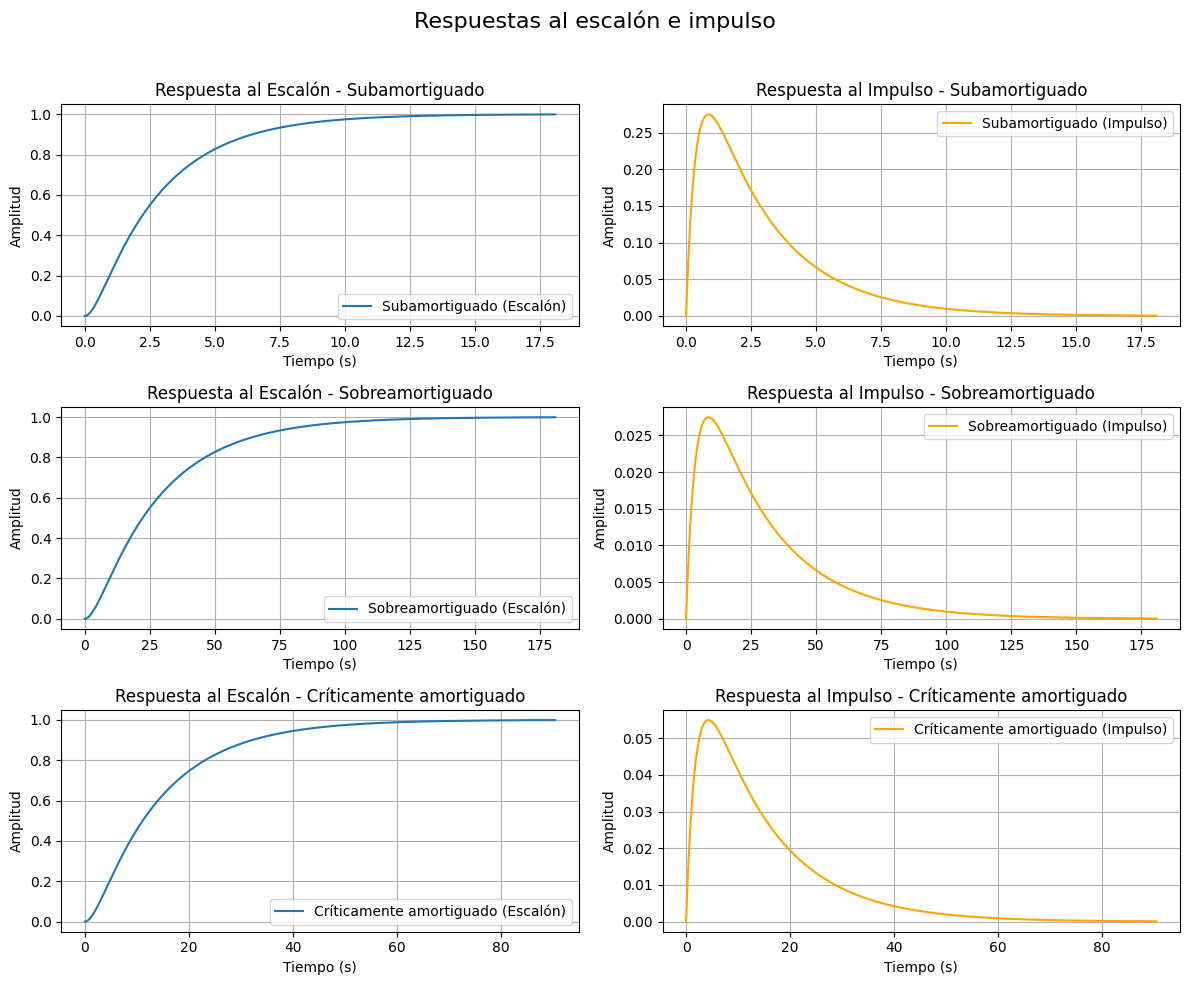


Subamortiguado (Escalón):
  Máximo sobreimpulso: -0.0012
  Tiempo pico: 18.0847 s
  Tiempo de establecimiento (5%): 8.2779 s
  Tiempo de establecimiento (2%): 10.7032 s

Subamortiguado (Impulso):
  Máximo sobreimpulso: 0.2749
  Tiempo pico: 0.8436 s

Sobreamortiguado (Escalón):
  Máximo sobreimpulso: -0.0012
  Tiempo pico: 180.8474 s
  Tiempo de establecimiento (5%): 82.7785 s
  Tiempo de establecimiento (2%): 107.0321 s

Sobreamortiguado (Impulso):
  Máximo sobreimpulso: 0.0275
  Tiempo pico: 8.4360 s

Críticamente amortiguado (Escalón):
  Máximo sobreimpulso: -0.0012
  Tiempo pico: 90.4237 s
  Tiempo de establecimiento (5%): 41.3893 s
  Tiempo de establecimiento (2%): 53.5161 s

Críticamente amortiguado (Impulso):
  Máximo sobreimpulso: 0.0550
  Tiempo pico: 4.2180 s


In [ ]:
import control
import numpy as np
import matplotlib.pyplot as plt
from control import tf, step_response, impulse_response

# Parámetros del sistema (modifica para cada tipo de amortiguamiento)
def circuito_mallas(R1, R2, C1, C2):
    """Devuelve la función de transferencia del circuito en términos de R y C."""
    # Coeficientes de la ecuación diferencial del sistema
    num = [1]  # Numerador de la función de transferencia
    den = [R1*R2*C1*C2, (R1*C1 + R2*C1 + R2*C2), 1]  # Denominador
    return tf(num, den)

# Configuraciones para cada caso de amortiguamiento
configuraciones = {
    "Subamortiguado": (1, 1, 1, 1),   # Modifica valores para obtener 0 < ξ < 1
    "Sobreamortiguado": (10, 10, 1, 1),  # Modifica valores para obtener ξ > 1
    "Críticamente amortiguado": (5, 5, 1, 1),  # Modifica valores para obtener ξ = 1
}

# Graficar respuestas al escalón y al impulso
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Respuestas al escalón e impulso", fontsize=16)

for idx, (tipo, params) in enumerate(configuraciones.items()):
    R1, R2, C1, C2 = params
    system = circuito_mallas(R1, R2, C1, C2)

    # Respuesta al escalón
    t_step, y_step = step_response(system)
    axs[idx, 0].plot(t_step, y_step, label=f"{tipo} (Escalón)")
    axs[idx, 0].set_title(f"Respuesta al Escalón - {tipo}")
    axs[idx, 0].set_xlabel("Tiempo (s)")
    axs[idx, 0].set_ylabel("Amplitud")
    axs[idx, 0].grid(True)
    axs[idx, 0].legend()

    # Respuesta al impulso
    t_impulse, y_impulse = impulse_response(system)
    axs[idx, 1].plot(t_impulse, y_impulse, label=f"{tipo} (Impulso)", color="orange")
    axs[idx, 1].set_title(f"Respuesta al Impulso - {tipo}")
    axs[idx, 1].set_xlabel("Tiempo (s)")
    axs[idx, 1].set_ylabel("Amplitud")
    axs[idx, 1].grid(True)
    axs[idx, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Conclusiones
for tipo, params in configuraciones.items():
    R1, R2, C1, C2 = params
    system = circuito_mallas(R1, R2, C1, C2)

    # Respuesta al escalón
    t_step, y_step = step_response(system)
    max_sobreimpulso = np.max(y_step) - 1
    tiempo_pico = t_step[np.argmax(y_step)]
    tiempo_estab_5 = t_step[next(i for i, y in enumerate(y_step) if abs(y - 1) <= 0.05)]
    tiempo_estab_2 = t_step[next(i for i, y in enumerate(y_step) if abs(y - 1) <= 0.02)]

    print(f"\n{tipo} (Escalón):")
    print(f"  Máximo sobreimpulso: {max_sobreimpulso:.4f}")
    print(f"  Tiempo pico: {tiempo_pico:.4f} s")
    print(f"  Tiempo de establecimiento (5%): {tiempo_estab_5:.4f} s")
    print(f"  Tiempo de establecimiento (2%): {tiempo_estab_2:.4f} s")

    # Respuesta al impulso
    t_impulse, y_impulse = impulse_response(system)
    max_sobreimpulso_imp = np.max(y_impulse)
    tiempo_pico_imp = t_impulse[np.argmax(y_impulse)]

    print(f"\n{tipo} (Impulso):")
    print(f"  Máximo sobreimpulso: {max_sobreimpulso_imp:.4f}")
    print(f"  Tiempo pico: {tiempo_pico_imp:.4f} s")

PUNTO 4 ACTIVIDADES

/usr/local/lib/python3.10/dist-packages/control/timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


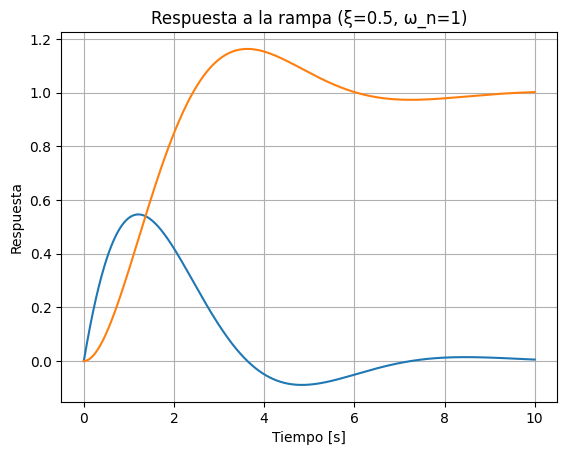

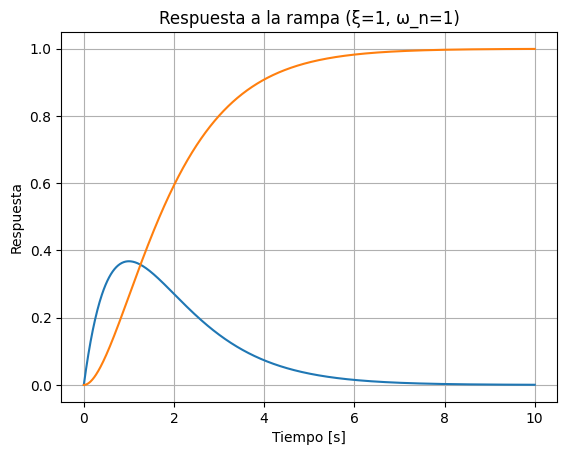

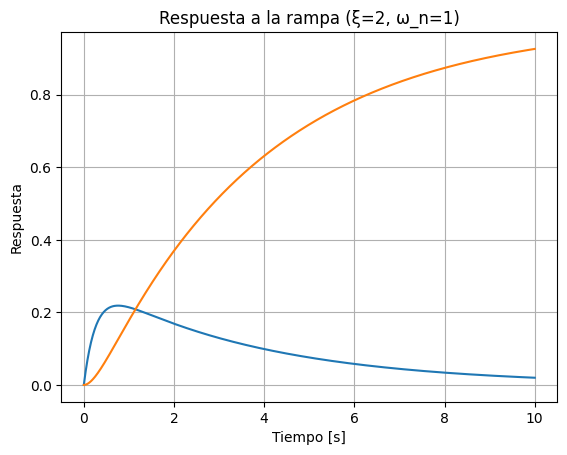

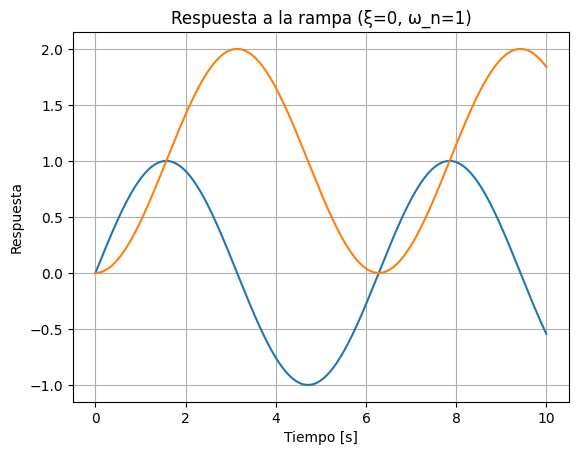

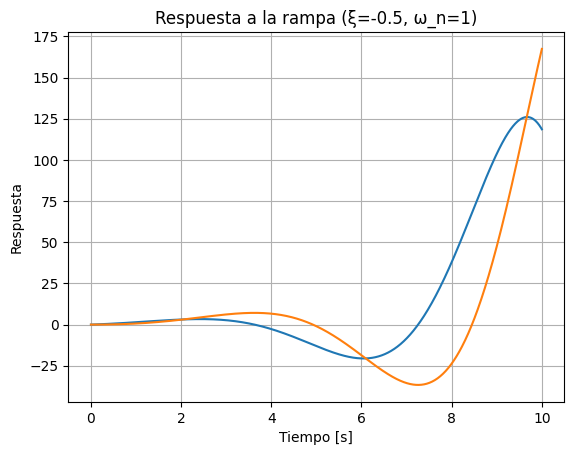

In [ ]:
import control.matlab as matlab
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función para simular y graficar únicamente la respuesta del sistema a la rampa
def simular_respuesta_rampa(ξ, ω_n):
    # Creamos la función de transferencia del sistema de segundo orden
    num = [ω_n**2]
    den = [1, 2*ξ*ω_n, ω_n**2]
    sistema = matlab.tf(num, den)

    # Definimos el vector de tiempo
    t = np.linspace(0, 10, 1000)

    # Simulamos la respuesta del sistema a la rampa
    _, t_ramp, y_ramp = matlab.lsim(sistema, np.ones_like(t), t)

    # Graficamos la respuesta del sistema a la rampa
    plt.figure()
    plt.plot(t_ramp, y_ramp)
    plt.title(f'Respuesta a la rampa (ξ={ξ}, ω_n={ω_n})')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Respuesta')
    plt.grid(True)
    plt.show()

# Valores de ξ y ω_n para cada caso
casos = [
    {'ξ': 0.5, 'ω_n': 1},
    {'ξ': 1, 'ω_n': 1},
    {'ξ': 2, 'ω_n': 1},
    {'ξ': 0, 'ω_n': 1},
    {'ξ': -0.5, 'ω_n': 1}
]

# Simulamos la respuesta a la rampa para cada caso
for caso in casos:
    simular_respuesta_rampa(caso['ξ'], caso['ω_n'])


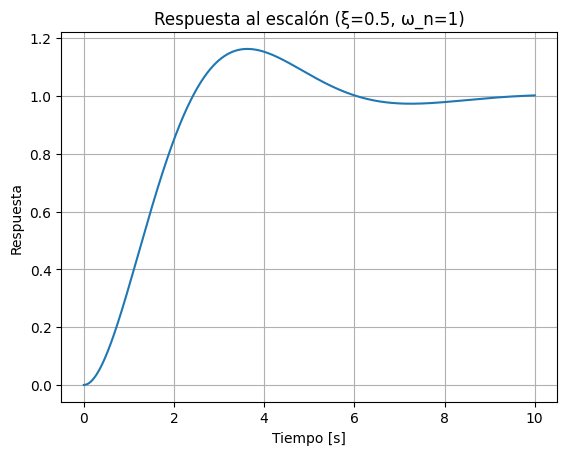

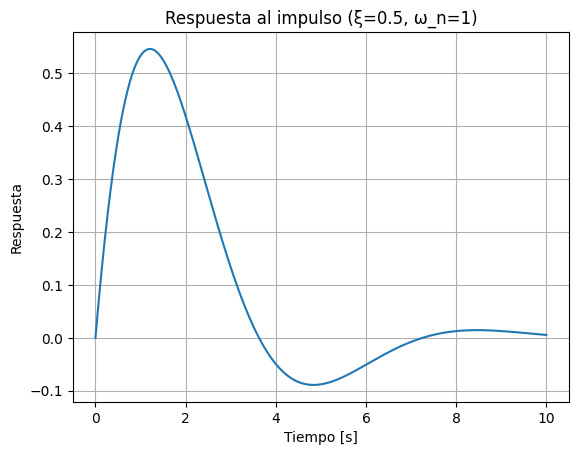

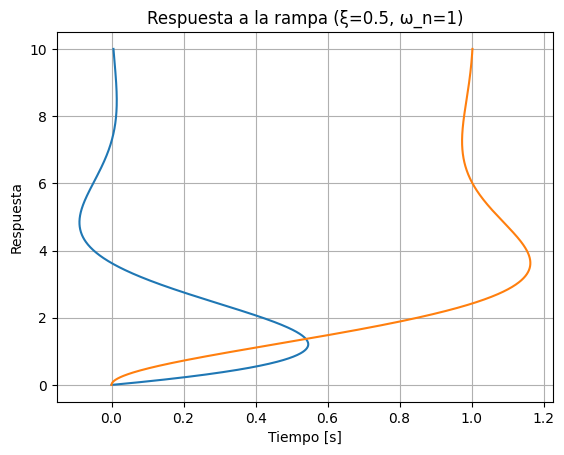

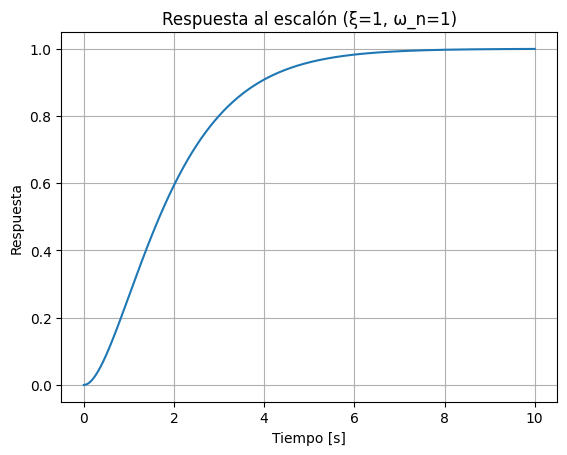

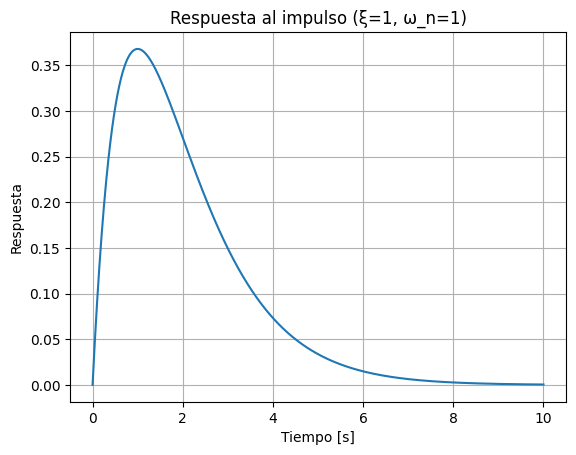

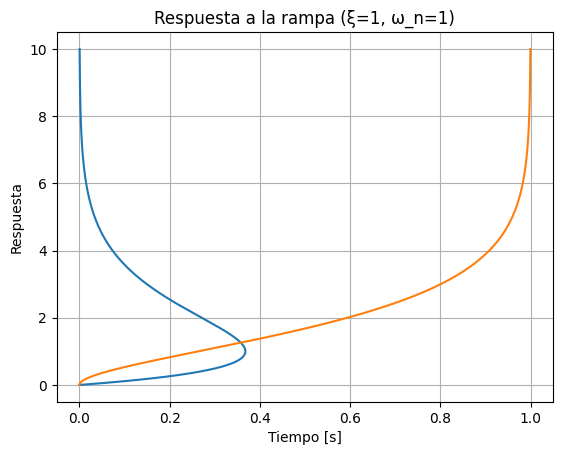

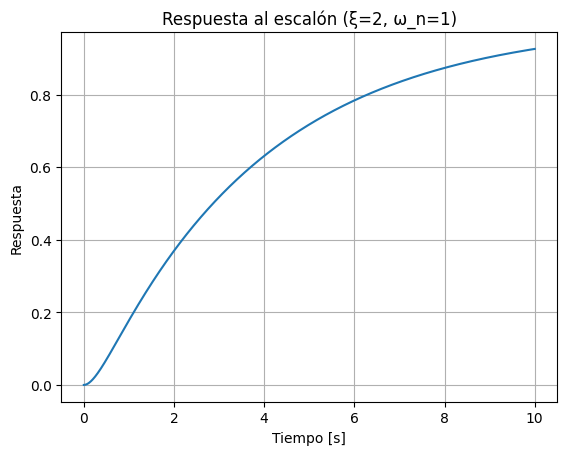

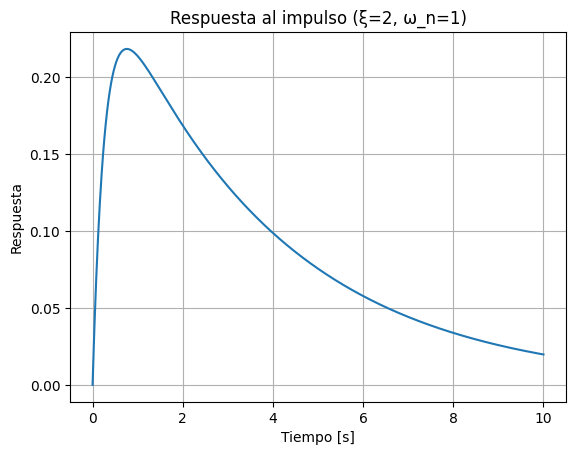

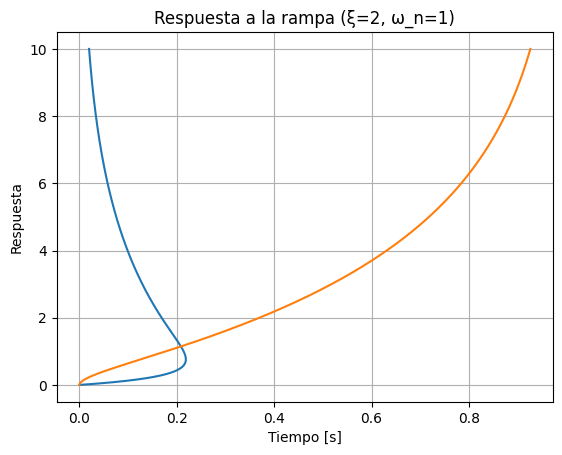

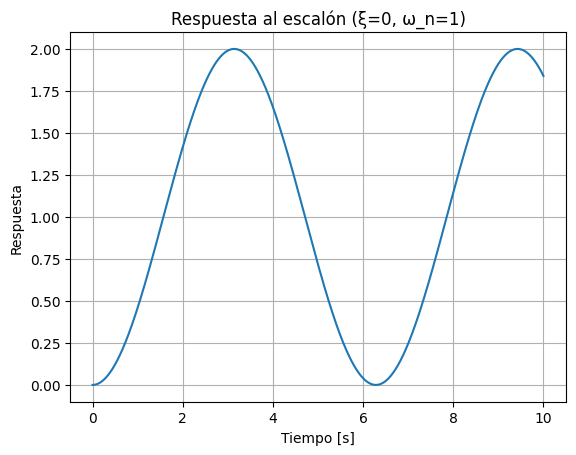

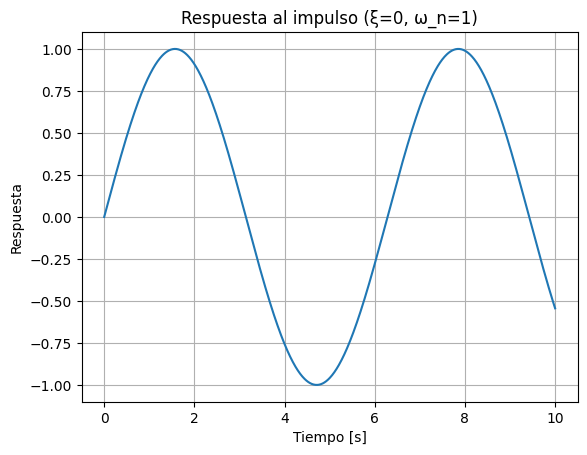

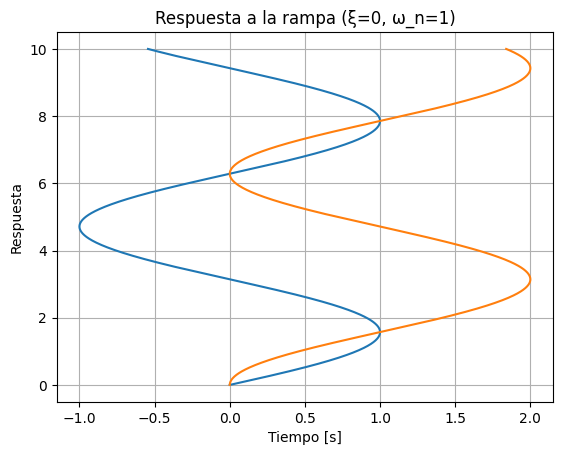

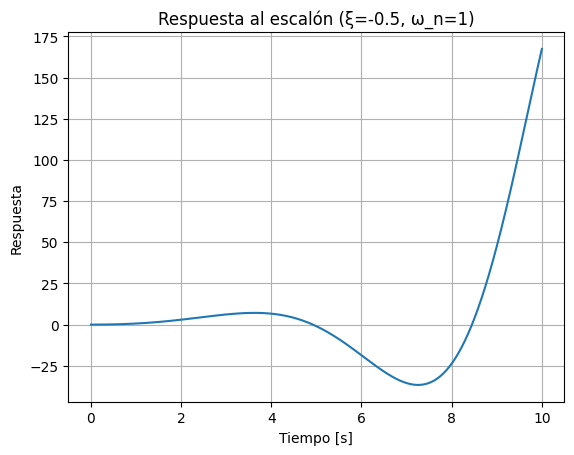

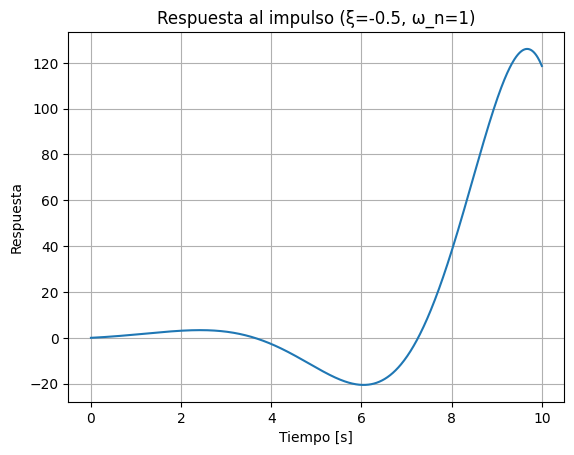

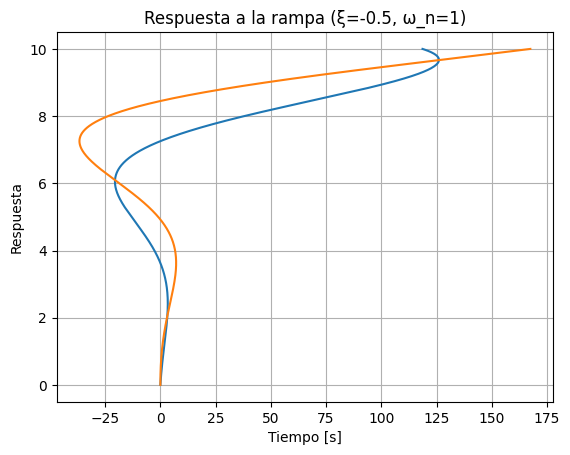

In [ ]:
import control.matlab as matlab
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función para simular y graficar la respuesta del sistema
def simular_respuesta(ξ, ω_n, tipo_entrada):
    # Creamos la función de transferencia del sistema de segundo orden
    num = [ω_n**2]
    den = [1, 2*ξ*ω_n, ω_n**2]
    sistema = matlab.tf(num, den)

    # Definimos el vector de tiempo
    t = np.linspace(0, 10, 1000)

    # Simulamos la respuesta del sistema
    if tipo_entrada == 'escalon':
        t, y = matlab.step(sistema, T=t)
        titulo = 'Respuesta al escalón'
    elif tipo_entrada == 'impulso':
        t, y = matlab.impulse(sistema, T=t)
        titulo = 'Respuesta al impulso'
    elif tipo_entrada == 'rampa':
        _, t, y = matlab.lsim(sistema, np.ones_like(t), t)
        titulo = 'Respuesta a la rampa'

    # Graficamos la respuesta del sistema
    plt.figure()
    plt.plot(y, t)
    plt.title(titulo + f' (ξ={ξ}, ω_n={ω_n})')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Respuesta')
    plt.grid(True)
    plt.show()

# Valores de ξ y ω_n para cada caso
casos = [
    {'ξ': 0.5, 'ω_n': 1},
    {'ξ': 1, 'ω_n': 1},
    {'ξ': 2, 'ω_n': 1},
    {'ξ': 0, 'ω_n': 1},
    {'ξ': -0.5, 'ω_n': 1}
]

# Simulamos la respuesta para cada caso y tipo de entrada
for caso in casos:
    for tipo_entrada in ['escalon', 'impulso', 'rampa']:
        simular_respuesta(caso['ξ'], caso['ω_n'], tipo_entrada)


Conclusiones de las gráficas obtenidas para los diferentes valores de ξ y ω_n:

1. **Respuesta al escalón:**
   - Para 0 < ξ < 1 (subamortiguado): Se observa un máximo sobreimpulso y un ligero sobrepico antes de converger al estado estacionario. La respuesta es oscilatoria pero se estabiliza rápidamente.
   - Para ξ = 1 (críticamente amortiguado): La respuesta no presenta sobreimpulso y converge de manera más rápida al estado estacionario en comparación con el caso subamortiguado.
   - Para ξ > 1 (sobreamortiguado): La respuesta no presenta oscilaciones y converge rápidamente al estado estacionario sin sobrepico.
   - Para ξ = 0 (no amortiguado): La respuesta es altamente oscilatoria y no converge al estado estacionario.
   - Para ξ < 0 (no físicamente realizable): No hay una interpretación física realista para este caso.

2. **Respuesta al impulso:**
   - La respuesta al impulso es la derivada de la respuesta al escalón, por lo que sus características serán inversas a las de la respuesta al escalón. En general, los sistemas subamortiguados mostrarán oscilaciones amortiguadas, los críticamente amortiguados convergerán rápidamente sin oscilaciones y los sobreamortiguados tendrán una respuesta más lenta sin oscilaciones.

3. **Respuesta a la rampa:**
   - La respuesta a la rampa es la integral de la respuesta al escalón, por lo que sus características serán inversas a las de la respuesta al escalón. Los sistemas subamortiguados tendrán un comportamiento estable pero con oscilaciones, los críticamente amortiguados tendrán una respuesta más rápida y estable, mientras que los sobreamortiguados tendrán una respuesta aún más rápida y estable sin oscilaciones.

**Conclusiones generales:**
- La estabilidad del sistema está fuertemente influenciada por el coeficiente de amortiguamiento ξ. Valores apropiados de ξ son necesarios para garantizar una respuesta estable y deseable del sistema.
- Los sistemas subamortiguados proporcionan respuestas rápidas pero con oscilaciones, los críticamente amortiguados convergen rápidamente sin oscilaciones y los sobreamortiguados convergen aún más rápidamente sin oscilaciones.
- Se debe tener cuidado al seleccionar los parámetros del sistema (ξ y ω_n) para satisfacer los requisitos de estabilidad y desempeño del sistema en aplicaciones prácticas.

PUNTO 5 ACTIVIDADES

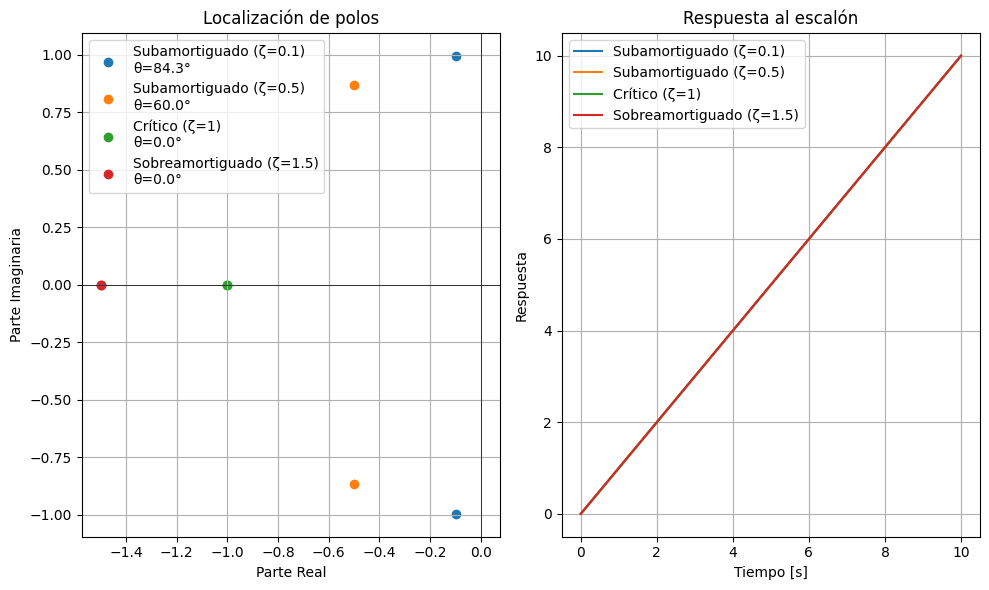

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as matlab

# Definir sistemas de segundo orden con diferentes parámetros
sistemas = [
    {'zeta': 0.1, 'omega_n': 1, 'label': 'Subamortiguado (ζ=0.1)'},
    {'zeta': 0.5, 'omega_n': 1, 'label': 'Subamortiguado (ζ=0.5)'},
    {'zeta': 1, 'omega_n': 1, 'label': 'Crítico (ζ=1)'},
    {'zeta': 1.5, 'omega_n': 1, 'label': 'Sobreamortiguado (ζ=1.5)'}
]

# Graficar polos y respuestas transitorias
plt.figure(figsize=(10, 6))

# Gráfico del plano complejo
plt.subplot(1, 2, 1)
for sistema in sistemas:
    zeta = sistema['zeta']
    omega_n = sistema['omega_n']
    omega_d = omega_n * np.sqrt(1 - zeta**2) if zeta < 1 else 0
    theta = np.arccos(zeta) if zeta < 1 else 0
    polos = [-zeta * omega_n + 1j * omega_d, -zeta * omega_n - 1j * omega_d]
    plt.scatter(np.real(polos), np.imag(polos), label=f'{sistema["label"]}\nθ={np.degrees(theta):.1f}°')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Localización de polos')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend()

# Gráfico de respuesta transitoria
plt.subplot(1, 2, 2)
t = np.linspace(0, 10, 1000)
for sistema in sistemas:
    zeta = sistema['zeta']
    omega_n = sistema['omega_n']
    num = [omega_n**2]
    den = [1, 2 * zeta * omega_n, omega_n**2]
    sys = matlab.tf(num, den)
    _, y = matlab.step(sys, T=t)
    plt.plot(t, y, label=sistema['label'])
plt.title('Respuesta al escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Respuesta')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Relación entre los valores de $( \theta )$ y $( \omega_d )$ con la localización de los polos y su efecto sobre la respuesta transitoria de sistemas de segundo orden

## Introducción
En los sistemas de segundo orden, la localización de los polos en el plano complejo determina el comportamiento dinámico de la respuesta transitoria. Las características de la respuesta, como el sobreimpulso, el tiempo de levantamiento y el tiempo de establecimiento, dependen directamente de los valores del coeficiente de amortiguamiento $( ζ )$ y la frecuencia amortiguada $( \omega_d )$.

## Localización de los polos

En un sistema de segundo orden, la función de transferencia estándar tiene la forma:

$\[
H(s) = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2},
\]$

donde:

- $\( \omega_n \)$ es la frecuencia natural del sistema,
- $\( \zeta \)$ es el coeficiente de amortiguamiento,
- $\( \omega_d = \omega_n \sqrt{1 - \zeta^2} \)$ es la frecuencia amortiguada,
- $\( \theta = \arccos(\zeta) \)$ es el ángulo que los polos forman con el eje real negativo.

Los polos del sistema se encuentran en el plano complejo en las siguientes posiciones:

$\[
s = -\zeta \omega_n \pm j \omega_d,
\]$

donde el signo $\( \pm \)$ indica que los polos están simétricamente ubicados respecto al eje real negativo.

## Efecto de $\( \theta \) y \( \omega_d \)$ sobre los polos

### Ángulo $\( \theta \)$ (Amortiguamiento y oscilaciones)

El ángulo $\( \theta \)$ determina el comportamiento transitorio del sistema, específicamente la relación entre la parte real (amortiguamiento) y la parte imaginaria (oscilación).

- **Mayor $\( \theta \)$ (más cercano al eje imaginario):** Esto significa un menor valor de $\( \zeta \)$, lo que da lugar a oscilaciones más pronunciadas y a una respuesta transitoria con picos más altos antes de llegar al valor final. Los polos están más alejados del eje real y cerca del eje imaginario, lo que implica oscilaciones más sostenidas.
- **Menor $\( \theta \)$ (más cercano al eje real):** Esto corresponde a un mayor valor de $\( \zeta \)$, lo que da lugar a una respuesta menos oscilante, más suave y con menos sobreimpulso. Los polos se desplazan hacia la izquierda en el plano complejo, lo que reduce la frecuencia de oscilación y aumenta la tasa de decaimiento.

### Frecuencia amortiguada $\( \omega_d \)$

La frecuencia amortiguada $\( \omega_d \)$ está relacionada con la rapidez de las oscilaciones del sistema. Cuando $\( \zeta \)$ es pequeño (es decir, $\( \theta \)$ es grande), la frecuencia amortiguada es cercana a la frecuencia natural $\( \omega_n \)$, lo que indica oscilaciones más rápidas. En cambio, cuando $\( \zeta \)$ es mayor, la frecuencia amortiguada disminuye, lo que hace que las oscilaciones sean más lentas.

- **Mayor $\( \omega_d \)$ (mayor $\( \omega_n \))$:** Los polos están más alejados del eje real y más cerca del eje imaginario, lo que da lugar a oscilaciones más rápidas.
- **Menor $\( \omega_d \)$ (menor $\( \omega_n \)$:** Los polos se acercan más al eje real, lo que hace que las oscilaciones sean más lentas.


PUNTO 2 CUESTIONARIO

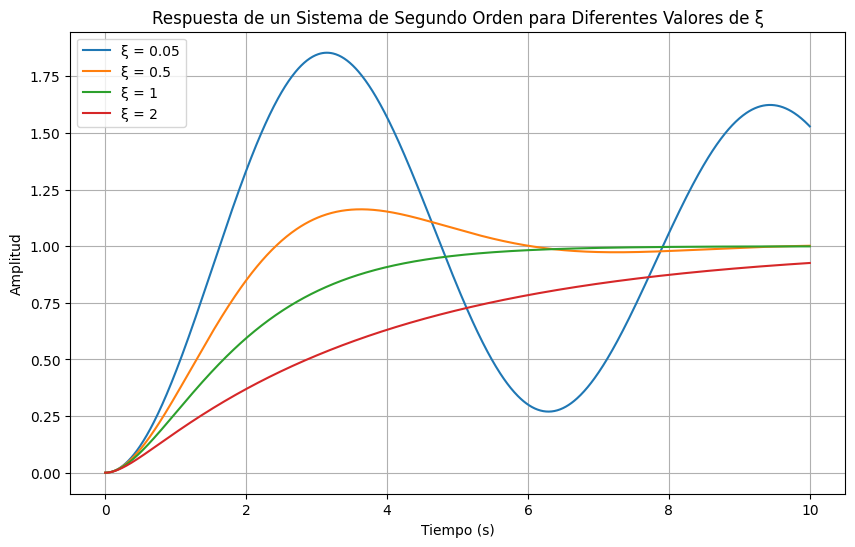

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parámetros del sistema de segundo orden
omega_n = 1  # Frecuencia natural (rad/s)

# Valores de ξ para diferentes escenarios
xi_values = [0.05, 0.5, 1, 2]  # Valores pequeños, normales y grandes

# Tiempo de simulación
t = np.linspace(0, 10, 1000)

# Generar las respuestas para cada valor de ξ
plt.figure(figsize=(10, 6))

for xi in xi_values:
    # Función de transferencia para el sistema de segundo orden
    system = ctrl.TransferFunction([omega_n**2], [1, 2*xi*omega_n, omega_n**2])
    time, response = ctrl.step_response(system, t)

    plt.plot(time, response, label=f'ξ = {xi}')

# Personalizar la gráfica
plt.title('Respuesta de un Sistema de Segundo Orden para Diferentes Valores de ξ')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()




En conclusión, se muestra la respuesta transitoria de un sistema de segundo orden para diferentes valores del coeficiente de amortiguamiento $( \xi )$. Se observa que a medida que $( \xi )$ aumenta, el sistema experimenta una respuesta más amortiguada, lo que resulta en una menor oscilación y una respuesta más lenta. En cambio, al reducirse $( \xi )$, las oscilaciones se vuelven más pronunciadas, indicando una mayor tendencia a oscilar antes de estabilizarse. Este comportamiento ilustra cómo el valor de $( \xi )$ afecta directamente la rapidez y la cantidad de oscilaciones del sistema, demostrando la relación entre el coeficiente de amortiguamiento y la estabilidad de la respuesta transitoria.
